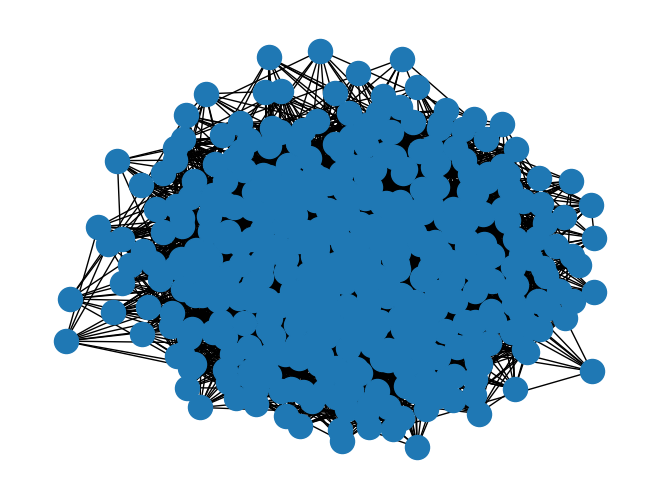

In [3]:
import networkx as nx  # NetworkX санг импортлох (сүлжээтэй ажиллахад ашиглагдана)
import warnings  # Анхааруулга (warnings) 
import pandas as pd  # Pandas санг импортлох (өгөгдөл боловсруулахад ашиглагдана)
import numpy as np  # NumPy санг импортлох (тоон тооцоололд ашиглагдана)
import matplotlib.pyplot as plt  # Matplotlib санг импортлох (зураг дүрслэхэд ашиглагдана)
import powerlaw  # Powerlaw санг импортлох 

warnings.filterwarnings('ignore')  # Анхааруулга мессежүүдийг ignore хийх

%matplotlib inline  #  графикуудыг шууд харуулах тохиргоо

# Санамсаргүй граф үүсгэх (Erdős–Rényi загвар ашиглан)
er = nx.erdos_renyi_graph(400, 0.05)  # 400 оройтой, 5% магадлалтай ирмэгүүд бүхий санамсаргүй граф үүсгэнэ

nx.draw(er)  # Үүсгэсэн графыг дүрслэх


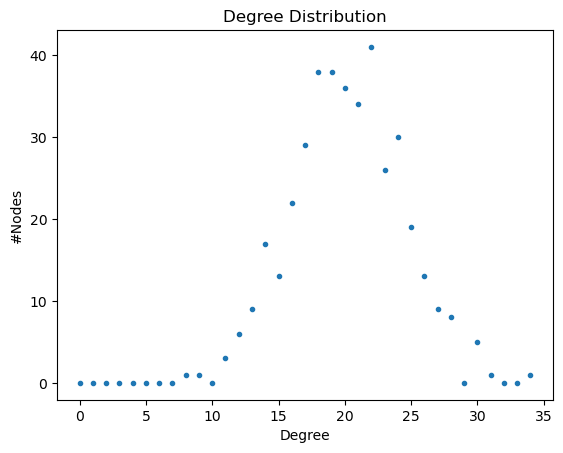

In [7]:
hist = nx.degree_histogram(er)  # Графын оройн зэрэг (degree)-ийн тархалтыг тооцоолох 

plt.plot(range(0, len(hist)), hist, ".")  #  оройнуудын тоог цэгэн графикаар дүрслэх
plt.title("Degree Distribution")  # Графикийн гарчгийг "Degree Distribution" гэж өгөх
plt.xlabel("Degree")  # Х тэнхлэгийн нэрийг "Degree" гэж оноох
plt.ylabel("#Nodes")  # Y тэнхлэгийн нэрийг "Nodes"-ийн тоо гэж оноох
plt.show()  # Графикийг дүрслэх


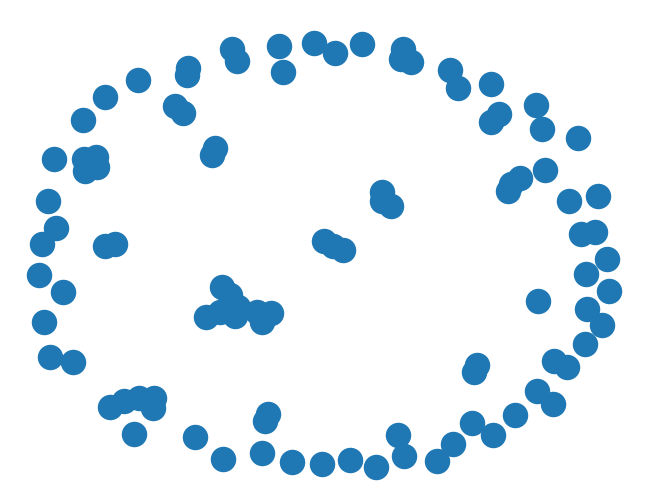

In [11]:
er = nx.erdos_renyi_graph(100, 0.005)  # 100 оройтой, ирмэг үүсэх магадлал нь 0.005 байх санамсаргүй граф үүсгэх
nx.draw(er)  # Үүсгэсэн графыг дүрслэх


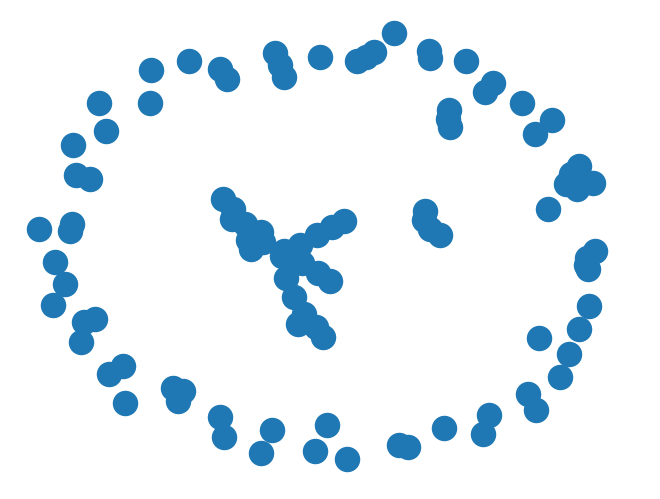

In [13]:
er = nx.erdos_renyi_graph(100, 0.01)  # 100 оройтой, ирмэг үүсэх магадлал 0.01 байх санамсаргүй граф үүсгэх
nx.draw(er)  # Үүсгэсэн графыг дүрслэх

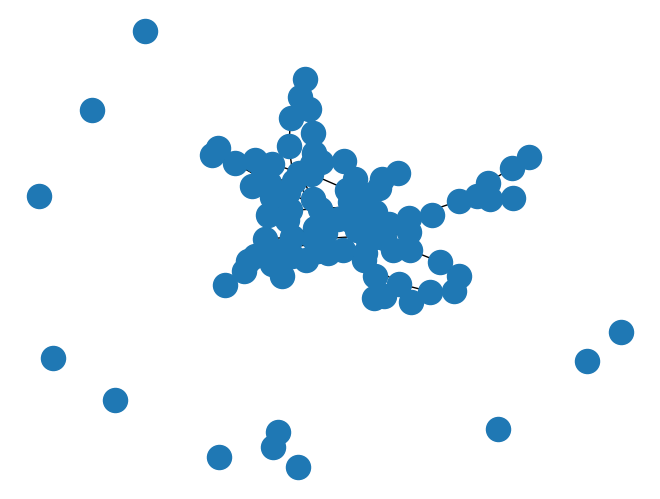

In [17]:
er = nx.erdos_renyi_graph(100, 0.02)  # 100 оройтой, ирмэг үүсэх магадлал 0.02 байх санамсаргүй граф үүсгэх
nx.draw(er)  # Үүсгэсэн графыг дүрслэх


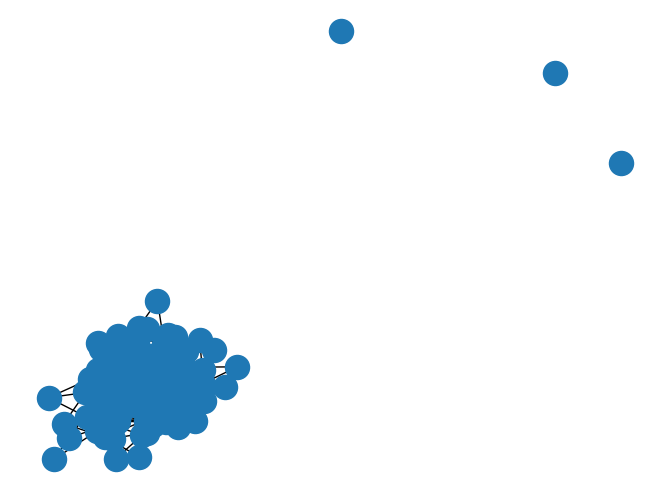

In [21]:
er = nx.erdos_renyi_graph(100, 0.06)  # 100 оройтой, ирмэг үүсэх магадлал 0.06 байх санамсаргүй граф үүсгэх
nx.draw(er)  # Үүсгэсэн графыг дүрслэх

In [23]:
g = nx.read_edgelist("/content/network.csv", delimiter=",", nodetype=int)  # CSV файлаас ирмэгийн жагсаалтаар граф уншина
sequence = [i[1] for i in g.degree()]  # Граф дахь бүх оройн degree-үүдийг жагсаалтад хадгална

cm = nx.configuration_model(sequence)  # Анхны графтай ижил degree-тэй санамсаргүй Configuration Model граф үүсгэнэ

hist_o = nx.degree_histogram(g)  # Анхны графын degree distribution-г тооцоолно
hist = nx.degree_histogram(cm)  # Configuration Model-ийн degree distribution-г тооцоолно

fig = plt.figure(figsize=(16, 6))  # 16x6 хэмжээтэй зураг үүсгэнэ
plt.subplot(1, 2, 1)  # 1 мөр, 2 багана бүхий subplot-ийн эхнийхийг сонгоно

plt.plot(range(0, len(hist_o)), hist_o, ".")  # Анхны графын degree тархалтыг зурна
plt.title("Degree Distribution Real Graph")  # Анхны графын тархалтын гарчиг
plt.xlabel("Degree")  # X тэнхлэгийн шошго
plt.ylabel("#Nodes")  # Y тэнхлэгийн шошго
plt.loglog()  # Log-log масштабаар дүрслэнэ

plt.subplot(1, 2, 2)  # 2 дахь subplot-д шилжинэ
plt.plot(range(0, len(hist)), hist, ".")  # Configuration Model-ийн degree тархалтыг зурна
plt.title("Degree Distribution Configuration Model")  # Configuration Model-ийн тархалтын гарчиг
plt.xlabel("Degree")  # X тэнхлэгийн шошго
plt.ylabel("#Nodes")  # Y тэнхлэгийн шошго
plt.loglog()  # Log-log масштабаар дүрслэнэ

plt.show()  # Бүх графикуудыг дэлгэцэнд харуулна


FileNotFoundError: [Errno 2] No such file or directory: '/content/network.csv'

In [25]:
import heapq

def dijkstra(graph, start):
    # Орой бүрийн хамгийн бага өртгийг хадгалах санах ой
    shortest_paths = {vertex: float('infinity') for vertex in graph}
    shortest_paths[start] = 0
    
    # Өртөг багатай оройг түрүүлж боловсруулахын тулд priority queue ашиглана
    priority_queue = [(0, start)]
    
    while priority_queue:
        current_distance, current_vertex = heapq.heappop(priority_queue)
        
        # Хэрэв илүү богино зам олдсон бол үргэлжлүүлэх шаардлагагүй
        if current_distance > shortest_paths[current_vertex]:
            continue
        
        # Хөрш оройнуудыг шалгах
        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight
            
            # Хэрэв шинэ зам өмнөхөөс богино бол update хийнэ
            if distance < shortest_paths[neighbor]:
                shortest_paths[neighbor] = distance
                heapq.heappush(priority_queue, (distance, neighbor))
    
    return shortest_paths

graph = {
    'v0': {'v1': 6, 'v2': 2, 'v3': 6},
    'v1': {'v0': 6, 'v2': 2, 'v4': 5},
    'v2': {'v0': 2, 'v1': 2, 'v3': 1, 'v5': 4},
    'v3': {'v0': 6, 'v2': 1, 'v6': 3},
    'v4': {'v1': 5, 'v5': 3, 'v7': 2},
    'v5': {'v2': 4, 'v4': 3, 'v6': 6},
    'v6': {'v3': 3, 'v5': 6, 'v7': 7},
    'v7': {'v4': 2, 'v6': 7}
}

# Эхлэх оройг v0 
start_node = 'v0'
shortest_paths = dijkstra(graph, start_node)

# Үр дүн хэвлэх
print("Хамгийн богино замууд:", shortest_paths)


Хамгийн богино замууд: {'v0': 0, 'v1': 4, 'v2': 2, 'v3': 3, 'v4': 9, 'v5': 6, 'v6': 6, 'v7': 11}
